<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analysis-of-similarity-between-model-output-and-target" data-toc-modified-id="Analysis-of-similarity-between-model-output-and-target-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analysis of similarity between model output and target</a></span><ul class="toc-item"><li><span><a href="#Example-of-prompt,-generated-output,-and-target" data-toc-modified-id="Example-of-prompt,-generated-output,-and-target-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example of prompt, generated output, and target</a></span></li><li><span><a href="#bert-score-analysis" data-toc-modified-id="bert-score-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>bert-score analysis</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-F1-scores" data-toc-modified-id="Distribution-of-F1-scores-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Distribution of F1 scores</a></span></li></ul></li><li><span><a href="#Rouge-score-analysis" data-toc-modified-id="Rouge-score-analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Rouge score analysis</a></span></li></ul></li><li><span><a href="#Answer-type-analysis" data-toc-modified-id="Answer-type-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Answer type analysis</a></span></li></ul></div>

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from evaluate import load
from statistics import mean


# Analysis of similarity between model output and target

In [7]:
prompts = []
model_outputs = []
model_str_outputs = []
ground_truth = []
ground_str_truth = []

with open('results/2023-10-14/Charmides..json') as f:
    results = json.load(f)
for res in results:
    if res['target'] is None:
        continue
    prompts.append([res['prompt']])
    model_outputs.append([res['output']])
    ground_truth.append([res['target']])
    model_str_outputs.append(res['output']) 
    ground_str_truth.append(res['target'])

## Example of prompt, generated output, and target 

In [10]:
print(f"Prompt: {prompts[111]}\n\n", f"Model's output: {model_outputs[111]}\n\n", 
      f"Target: {ground_truth[111]}")

Prompt: ['I will give you a passage and a question, please provide a precise answer. Passage: And now you perceive, I said, that no such science is to be found anywhere.I perceive, he said.Yet the a priori idea of knowledge may make it easier to test the knowledge of others.May we assume then, I said, that wisdom, viewed in this new light merely as a knowledge of knowledge and ignorance, has this advantage:—that he who possesses such knowledge will more easily learn anything which he learns; and that everything will be clearer to him, because, in addition to the knowledge of individuals, he sees the science, and this also will better enable him to test the knowledge which others have of what he knows himself; whereas the enquirer who is without this knowledge may be supposed to have a feebler and weaker insight? Are not these, my friend, the real advantages which are to be gained from wisdom? Based on the previous context answer this question: He will consider whether what he says is t

## bert-score analysis

In [5]:
# pip install bert_score

bertscore = load("bertscore")
scores = []
for i in range(len(model_outputs)):
    score = bertscore.compute(predictions=model_outputs[i], references=ground_truth[i], lang="en")
    scores.append(score)

f1_scores = [score['f1'][0] for score in scores]
precision_scores = [score['precision'][0] for score in scores]
recall_scores = [score['recall'][0] for score in scores]

avg_f1_score = mean(f1_scores)
avg_precision_score = mean(precision_scores)  
avg_recall_score = mean(recall_scores)

Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

0
1
2
3


4
5


6
7
8
9
10


11
12


13
14
15
16
17
18
19
20


21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48


49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


65
66
67
68
69
70
71
72
73


74
75
76
77
78


79
80
81


82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


101
102
103
104
105
106
107
108
109
110


111
112
113
114
115
116
117
118
119


120
121
122
123


124
125
126
127


128
129


### Distribution of F1 scores

(array([ 18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1., 111.]),
 array([0.        , 0.08564882, 0.17129765, 0.25694647, 0.34259529,
        0.42824411, 0.51389294, 0.59954176, 0.68519058, 0.77083941,
        0.85648823]),
 <BarContainer object of 10 artists>)

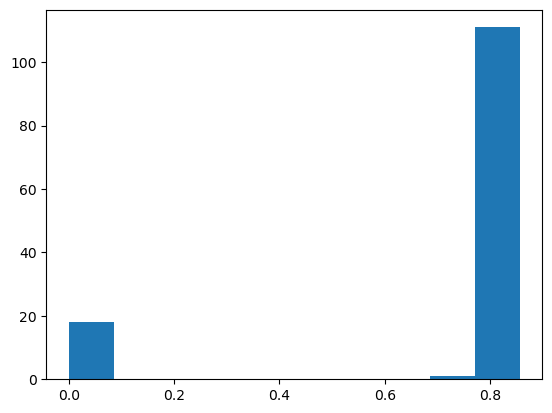

In [38]:
plt.hist(f1_scores)

In [16]:
print(f'Average F1 score is {avg_f1_score}')
print(f'Average Precision score is {avg_precision_score}')
print(f'Average Recall score is {avg_recall_score}')

Average F1 score is 0.7099208240325634
Average Precision score is 0.6785039379046514
Average Recall score is 0.7451146909823785


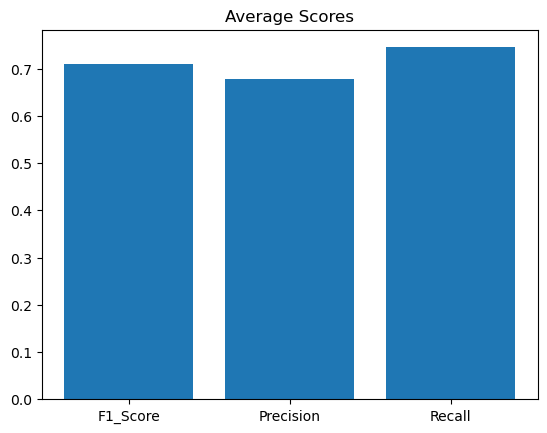

In [17]:
# Visualizations  
plt.bar(['F1_Score', 'Precision', 'Recall'], [avg_f1_score, avg_precision_score, avg_recall_score])
plt.title('Average Scores')
plt.savefig('BERTscores2.png')

## Rouge score analysis

In [43]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)


# Calculate ROUGE scores
rouge_scores = []
for i in range(len(model_outputs)):
    rouge_score = scorer.score(model_str_outputs[i], ground_str_truth[i])
    rouge_scores.append(rouge_score)


# # Print ROUGE-1 F1 score 
# print(f"ROUGE-1 F1 score: {rouge_scores[0]['rouge1'].fmeasure}" )
# print(rouge_scores[0]['rouge1'][1])

First ROUGE score: {'rouge1': Score(precision=0.3191489361702128, recall=0.19230769230769232, fmeasure=0.24000000000000002), 'rougeL': Score(precision=0.1702127659574468, recall=0.10256410256410256, fmeasure=0.128)}


In [29]:
from statistics import mean

rouge1_f1_scores = [score['rouge1'][2] for score in rouge_scores]
rouge1_precision_scores = [score['rouge1'][0] for score in rouge_scores]
rouge1_recall_scores = [score['rouge1'][1] for score in rouge_scores]

rougeL_f1_scores = [score['rougeL'][2] for score in rouge_scores]
rougeL_precision_scores = [score['rougeL'][0] for score in rouge_scores]
rougeL_recall_scores = [score['rougeL'][1] for score in rouge_scores]

avg_rouge1_f1_score = mean(rouge1_f1_scores)
avg_rouge1_precision_score = mean(rouge1_precision_scores)
avg_rouge1_recall_score = mean(rouge1_recall_scores)

avg_rougeL_f1_score = mean(rougeL_f1_scores)
avg_rougeL_precision_score = mean(rougeL_precision_scores)
avg_rougeL_recall_score = mean(rougeL_recall_scores)

In [31]:
print(f'Average F1 score for rouge1 and rougeL are {avg_rouge1_f1_score}, {avg_rougeL_f1_score}')
print(f'Average Precision for rouge1 and rougeL are  {avg_rouge1_precision_score}, {avg_rougeL_precision_score}')
print(f'Average Recall for rouge1 and rougeL are {avg_rouge1_recall_score}, {avg_rougeL_recall_score}')

Average F1 score for rouge1 and rougeL are 0.04796313121661261, 0.034900481211425305
Average Precision for rouge1 and rougeL are  0.35943304337926973, 0.31579073448188266
Average Recall for rouge1 and rougeL are 0.03369155308708208, 0.02316886990048641


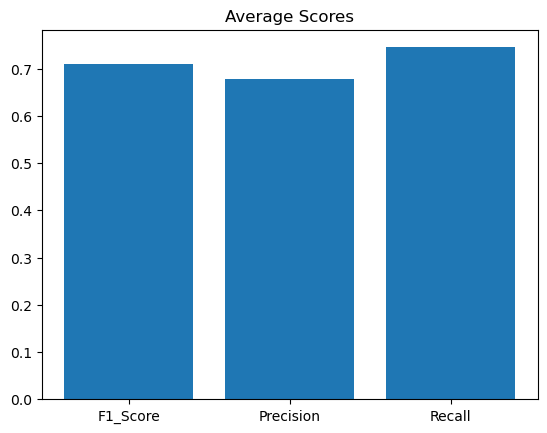

In [30]:
# Visualizations  
plt.bar(['F1_Score', 'Precision', 'Recall'], [avg_rouge1_f1_score, avg_rouge1_precision_score, avg_rouge1_recall_score])
plt.title('Average Scores')
plt.savefig('ROUGEscores.png')

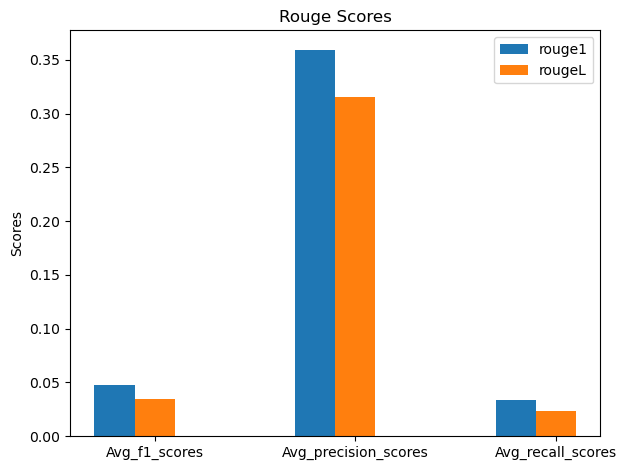

In [32]:
categories = ['Avg_f1_scores', 'Avg_precision_scores', 'Avg_recall_scores']
rouge1 = [avg_rouge1_f1_score, avg_rouge1_precision_score, avg_rouge1_recall_score]
rougeL = [avg_rougeL_f1_score, avg_rougeL_precision_score, avg_rougeL_recall_score]

# Number of categories
num_categories = len(categories)

# Width of a bar
bar_width = 0.2

# Bar positions for each category
x = np.arange(num_categories)

# Create subplots to group F1, Precision, and Recall scores
fig, ax = plt.subplots()

# Grouped bar for F1 scores
plt.bar(x - bar_width, rouge1, bar_width, label='rouge1', align='center')

# Grouped bar for Precision scores
plt.bar(x, rougeL, bar_width, label='rougeL', align='center')

# Set x-axis labels
plt.xticks(x, categories)

# Set y-axis label
plt.ylabel('Scores')

# Set the title for the chart
plt.title('Rouge Scores')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Answer type analysis

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sakshambassi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 75.00%


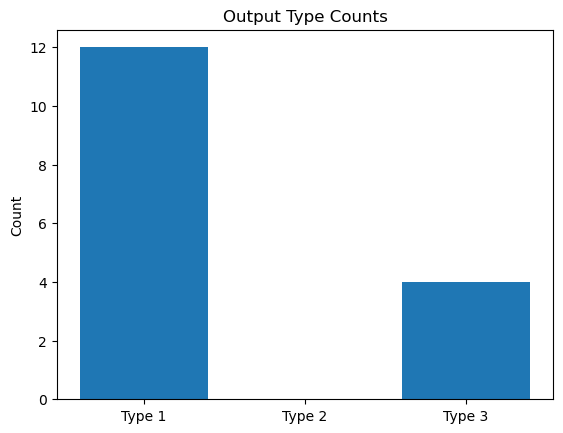

In [37]:
import json
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import wordnet
from fuzzywuzzy import fuzz

nltk.download('wordnet')
with open('results/2023-10-14/Charmides..json') as f:
    results = json.load(f)

type1_count = 0
type2_count = 0
type3_count = 0

for res in results:
    if res['target'] is None:
        continue

    if fuzz.partial_ratio(res['output'], res['target']) > 80:
        type3_count += 1

    else:
        target_synsets = wordnet.synsets(res['target'])

        for syn in target_synsets:
            for lemma in syn.lemmas():
                if lemma.name() == res['output']:
                    type2_count += 1
                    break

        if type2_count == 0:
            if fuzz.partial_ratio(res['output'], res['target']) > 60:
                type1_count += 1

# Visualizations
plt.bar(['Type 1', 'Type 2', 'Type 3'], [type1_count, type2_count, type3_count])
plt.title('Output Type Counts')
plt.ylabel('Count')
plt.savefig('output_types.png')

total = type1_count + type2_count + type3_count
accuracy = type1_count / total
print(f'Accuracy: {accuracy*100:.2f}%')
